#### Business Context:
- Customer segmentation is a very significant technique that is used in marketing and business strategy. It allows identification of distinct customer groups so that businesses can prepare their marketing efforts, product offering, and services to meet their specific needs. The assignment deals with the development of meaningful customer segments, and that could be done through clustering techniques since the concept does allow excavation of hidden patterns in customer behavior.

- We focus on the clustering techniques, which enable us to group our customers based on a variety of features such as purchasing habits, payment behavior, and credit usage. Such insights may drive business to personalize its interaction with the various segments of customers, making the targeting much more effective and profitable.

#### Data Cleaning:
- The dataset contains 8950 records and features such as balance frequency, purchase habits, cash advances, credit limits, and tenure.
- Two columns with missing values:
   - CREDIT_LIMIT: Contains 1 missing value.
   - MINIMUM_PAYMENTS: Has a few null values. This column requires investigation. For example:
      - If customers pay their balance in full (indicated by PRC_FULL_PAYMENT = 1), it is normal to see a value of 0 for minimum payments.
      - Imputed remaining missing MINIMUM_PAYMENTS with median (didn't choose mean because of outliers) grouped by similar customers, filled missing MINIMUM_PAYMENTS with the median based on similar BALANCE groups
         - BALANCE: This is the most direct indicator, as minimum payments are generally a percentage of the outstanding balance. 


#### Data Exploration Summary:
- High-spending customers show a preference for large one-off purchases, suggesting impulsive buying behavior or luxury spending habits.
- Installment-based buyers tend to spread payments over time, indicating more budget-conscious behavior or planned purchases.
- Customers relying on cash advances exhibit high liquidity needs, pointing to potential financial stress or emergency requirements.
- Frequent buyers with low credit limits suggest active credit usage within their constraints, making them candidates for credit limit increases or rewards programs.
- Customers with full-balance payments (PRC_FULL_PAYMENT = 1) have no minimum payments, indicating disciplined financial behavior. These low-risk customers are ideal for premium product offerings.
- Long-tenure customers show stable and consistent credit usage, making them good candidates for loyalty or retention programs.
- Newer accounts tend to have greater variability in behavior, with some relying heavily on cash advances, suggesting a need for customer education or targeted outreach.
- Outliers with extremely high purchases or cash advances can skew the data, highlighting the importance of algorithms like DBSCAN to detect and handle them.
- Customers with high balances but low purchase activity represent an underutilized segment that could benefit from targeted marketing campaigns to encourage spending.


Among all the monetary value-related fields, Balance and Purchases are the columns that might introduce bias in customer behavior and clustering due to the presence of outliers.

- Balance reflects the remaining balance in each customer’s account. Outliers on both the high and low ends can introduce biases in the clustering process by emphasizing financial behaviors that may not represent the majority of customers.

    - Extremely high balances are often held by exceptionally wealthy customers who may have distinct spending patterns compared to typical customers. Including these customers could skew clusters in a way that doesn’t accurately reflect the general financial habits of the broader customer base.
    - Extremely low balances often correspond to inactive customers. Their behaviors do not align with the typical customer engagement levels, and thus, removing these outliers helps ensure clusters are representative of majority of the users.

- Purchases represents the total amount spent by customers within a defined timeframe (the past six months). Since this timeframe is fixed and not very sensitive to the customer’s tenure, outliers can introduce bias in customer behavior analysis.

    - Extremely high purchase amounts often signify wealthy customers with atypical spending behavior that doesn’t reflect the average customer. Including these outliers could skew clusters towards high spending. 
    - Extremely low purchase amounts could indicate inactive accounts. These behaviors are not indicative of the average customer’s spending and may introduce noise, making clusters less effective in capturing meaningful purchasing patterns.

From the heatmap, there are in total 16 pairs of variables that are moderately and/or highly correlated (correlation coefficient > 0.5) - this might lead to redundancy and noise for clustering later on. Therefore, removing redundant variables is important. 

- Purchases
    - Purchases and Oneoff_Purchases(0.75)
    - Purchases and Installments_Purchases (0.67)
    - Purchases and Purchases_Frequency(0.60)
    - Purchases and Oneoff_Purchases_Frequency (0.55)
    - Purchases and Purchases_TRX (0.67)  
   

- Oneoff_Purchases
    - Oneoff_Purchases and Oneoff_Purchases_Frequency (0.71)

- Installments_Purchases
    - Installments_Purchases and Purchase_Frequency (0.62)
    - Installments_Purchases and Purchase_Installements_Frequency (0.7)
    - Installments_Purchases and Purchases_TRX (0.60)


- Cash_Advance
    - Cash_Advance and Cash_Advance_Frequency (0.62)
    - Cash_Advance and Cash_Advance_TRX (0.61)
    - Cash_Advance and Payments (0.52)

- Purchases_Frequency
    - Purchases_Frequency and Purchases_Installments_Frequency (0.87)
    - Purchases_Frequency and Purchases_TRX (0.7)

- Purchase_TRX
    - Purchase_TRX and Purchase_Installements_Frequency (0.62)

- Cash_Advance_TRX
    - Cash_Advance_TRX and Cash_Advance_Frequency (0.79)


#### Feature Selection: 

To achieve customer segmentation on the use of credit cards, we analyzed customer behaviors using the RFM (Recency, Frequency, Monetary) approach. This framework allows us to observe how recently customers engaged with their credit cards (Recency), how frequently they use their credit cards for various transactions (Frequency), and the monetary value associated with their credit card usage (Monetary).

In selecting features, we focused on capturing essential aspects of customer behavior within this RFM framework while carefully considering correlations to minimize redundancy and potential bias. 

For Recency, TENURE is chosen, which serves as a reliable proxy for the customer’s length of engagement, indirectly reflecting recent activity. 

Under Frequency, we selected ONEOFF_PURCHASES_FREQUENCY and CASH_ADVANCE_FREQUENCY to represent distinct spending behaviors—discretionary one-time purchases and cash advances. These two features can indicate different types of users: those with higher financial flexibility may make more frequent one-time purchases, while those with tighter financial constraints might rely on cash advances more often. This combination avoids overlap while capturing key frequency-related behaviors, providing insights into two distinct user segments. 

For Monetary value, BALANCE, PURCHASES, CREDIT_LIMIT, and PAYMENTS are chosen to cover the customer’s ongoing balance, spending power, credit allowance, and payment obligations. This selection offers a comprehensive view of monetary engagement without introducing redundancy, enabling a more accurate and meaningful segmentation of customer credit card usage.


Recency: TENURE

Frequency: ONEOFF_PURCHASES_FREQUENCY, CASH_ADVANCE_FREQUENCY

Monetary: BALANCE, PURCHASES, CREDIT_LIMIT, PAYMENTS

#### Clustering Algorithms

We implemented three clustering algorithms—K-Means, Agglomerative Clustering, and DBSCAN—to discover patterns within the customer data. We also had tried the HDBSCAN model, however the Silhouette score was -0.18, which means the clusters are misclassified, therefore, it is not being considered for the analysis. Below is a breakdown of each method, the techniques used to determine the optimal number of clusters, and a discussion of the results

Comparison of Algorithms and Selection:

K-Means:
- Strengths: Fast, scalable, suitable for large datasets with clear cluster boundaries.
- Limitations: Requires pre-specifying K, struggles with irregular cluster shapes and noise.

Agglomerative:
- Strengths: Reveals hierarchical structure; useful for small datasets.
- Limitations: Computationally expensive; less effective with large datasets.

DBSCAN:
- Strengths: Effective for irregularly shaped clusters, handles noise and outliers well.
- Limitations: Struggles with datasets of varying density, finding optimal parameters can be tricky.

The Silhouette Score for each algorithm was analyzed to determine how distinct the clusters were:
- K-Means: 0.31, Moderate separation, with actionable clusters.
- Agglomerative: 0.26, Overlapping clusters with less clarity.
- DBSCAN: 0.27, Struggles with cluster separation, indicating possible noise.	

Comparing the Silhouette Scores, K-Means marginally outperformed the other two algorithms, indicating better separation between clusters. The elbow method for K-means suggested an optimal number of clusters as 5, using which the silhouette score was calculated. 


Algorithm Selection:

Based on the characteristics of the dataset: 
K-Means was selected for its efficiency, scalability, and interpretability.
- K-Means computational speed is a priority and it provided clear and actionable customer segments. The five clusters identified by K-Means align well with the business need for targeted engagement strategies and customized service offerings. The comparative well-defined segments allow the business to implement effective marketing strategies for each group, maximizing engagement and retention.
- Agglomerative is suitable if deeper insights into the structure of the data are needed, but it may be too slow for very large datasets.
- DBSCAN is not chosen - a dataset that has been standard scaled, an eps of 0.8 could lead to either overclassification of noise or incorrect merging of distinct clusters, as it may capture points that fall within a relatively large radius in the standardized feature space.



#### Interpreting Clusters

Cluster Descriptions for K-Means:
The K-Means clustering algorithm segmented the customers into five distinct clusters, each characterized by unique financial behaviors and consumption patterns - with the TENURE, ONEOFF_PURCHASE_FREQUENCY, CASH_ADVANCE_FREQUENCY, BALANCE, PURCHASES, CREDIT_LIMIT, PAYMENTS. Below is a detailed characterization of each cluster based on the analysis of the data, including the most significant features distinguishing each cluster and recommended strategies for business engagement.

- Cluster 0: Balance is 2421.749212 and CREDIT_LIMIT is 7831.3893. 
  - Through these two indicators, we can see that this category of users is a high-quality user group. There are relatively rich balances and credit card limits in this group, these customers exhibit financial stability and strong purchasing power, making them highly valuable for the business, better services should be provided to this group of users to prevent the loss of such users.
  - Distinguishing Features: Credit Limit and Balance both are significantly higher compared to other clusters, indicating financial capability and a preference for managing funds through high-limit credit cards.
  
- Cluster 1: Balance is 2464.108998, CREDIT_LIMIT is 4548.422023 CASH_ADVANCE_FREQUENCY is 0.33. 
  - You can see from these indicators. This group of people is not as large as the previous group of people, but the balance and cash utilization rate are also relatively high. This group of users may be short-term capital turnover users, and relevant strategies can be added for this group of users. Encourage such users to use the frequency of payment.
  - Distinguishing Features: A high frequency of cash advances suggests reliance on credit for liquidity management. Moderate credit limit and balance, indicates they are active users but may not have as high financial standing as Cluster 0.
  
- Cluster 2: CASH_ADVANCE_FREQUENCY is 0.04 and ONEOFF_PURCHASES_FREQUENCY is 0.53. 
  - From these two indicators, this type of user one-time consumption is relatively high, cash payment frequency is relatively low, their behavior indicates that they prefer one-off, high-value transactions and are less dependent on revolving credit, can be targeted at this type of user consumption is relatively high for points or cash rebate to promote consumption.
  - Distinguishing Features: High one-time purchase frequency, this sets them apart as users who engage in large purchases sporadically. The other hand is low cash advance usage, Indicates they have low dependency on cash advances, possibly due to better financial planning.

- Cluster 3: BALANCE is 514.2142 and PAYMENTS is 705.423402. 
  - Through these two indicators, it can be seen that such users have low consumption frequency and low consumption desire.It may be a new user or a loss of users, you can increase the relevant basic benefits for such users.
  - Distinguishing Features: Balance and payment activity are significantly lower compared to other clusters, suggesting low spending motivation or disengagement. Minimal financial activity makes this group a prime candidate for churn prevention strategies.

- Cluster 4: TENURE is 7.365297 and CASH_ADVANCE_FREQUENCY is 0.185860. 
  - Through these two indicators, we can see that this kind of user group has short service life and low consumption. It may be new users, and relevant consumption incentives can be implemented to promote consumption strategies for such users.
  - Distinguishing Features: The low tenure indicates that these users recently joined the platform. Limited cash advance usage indicate their financial activity is minimal, suggesting they are still exploring the service.

#### Actionable Insights and Business Impact

The K-Means clustering results provided insights into five distinct customer segments, each with unique behaviors and financial characteristics. Below are detailed recommendations and strategies to enhance customer engagement, maximize retention, and promote usage for each cluster.

- Cluster 0 High-Quality Users: 
   - Provide tailored financial products (e.g., personalized savings plans, premium credit cards) and VIP support to enhance their experience.
   - Evaluate their credit behavior to offer higher credit limits, increasing their spending potential.
   - Provide early access to promotions, loyalty programs, and premium experiences (e.g., airport lounges or concierge services).
   - Use predictive models to monitor early signs of churn and offer retention bonuses or rewards proactively.

- Cluster 1 Short-Term Capital Users: 
   - Offer personal loans or credit cards with lower interest rates to encourage higher usage.
   - Design spending thresholds with rewards to incentivize credit card usage (e.g., “Spend $500 and earn double points”).
   - Offer temporary cash advance discounts or interest-free periods to increase cash advance utilization.
   - Provide bill payment reminders and payment incentives (e.g., small cashback on timely payments).

- Cluster 2 One-Time High-Spending Consumers:
   - Create targeted promotions that reward high-value purchases with cashback or extra loyalty points.\
   - Send real-time notifications for flash sales or limited-time offers, enhancing engagement by appealing to their impulsive buying nature.
   - Develop exclusive product bundles or time-sensitive discounts to encourage additional one-off purchases.
   - Offer tiered loyalty programs to encourage sustained engagement (e.g., "Spend $5,000 this year to earn Gold status").
   - Provide installment payment options for big-ticket items to make purchases more accessible.

- Cluster 3: Low-Frequency or At-Risk Users:
   - Offer first-use incentives or cashback rewards to encourage initial transactions.
   - Provide educational content about the benefits of using credit cards to increase their familiarity with the service.
   - Periodically reach out to dormant customers with reminders by implementing personalized reactivation campaigns (e.g., email campaigns with exclusive offers to encourage credit card usage).

- Cluster 4: New Users with Limited Engagement:
   - Provide onboarding campaigns with first-purchase discounts or cashback on initial transactions.
   - Offer zero-interest periods or sign-up bonuses to encourage quick engagement.
   - Use usage data to identify behavior patterns and offer personalized promotions to keep them engaged.

Assumptions for the Business Impact:
- Total annual revenue: $2,000,000
- Average spending per customer: $200


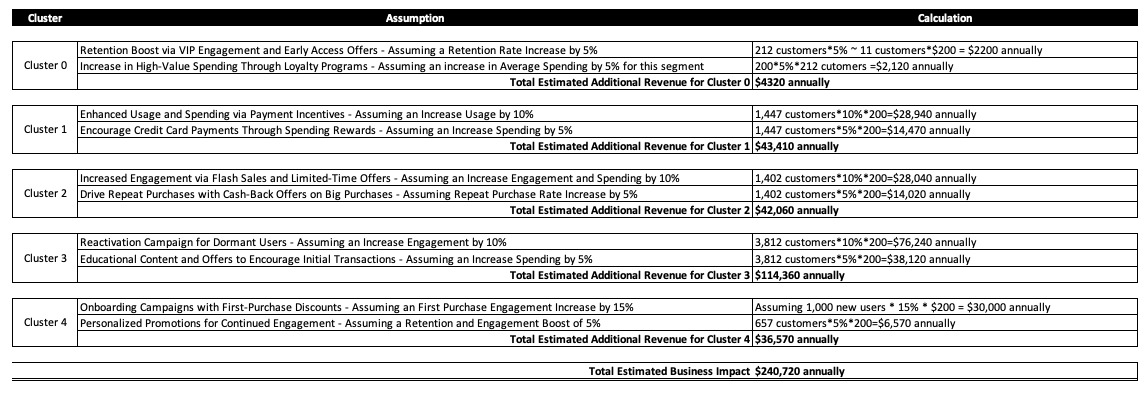



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, AffinityPropagation, MeanShift, SpectralClustering, AgglomerativeClustering, DBSCAN, HDBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

## Data Processing

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Emily8020/schulich_data_science/refs/heads/main/Customer_Data.csv")

df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [3]:
df.info()

# Data types are consistent with their field 
# Notice MINIMUM_PAYMENTS have a few null values, require further investiagtion on this column
# Notice CREDIT_LIMIT has 1 missing value too - 
# If a customer have a 0 credit limit, examining the frequency and context (e.g., new accounts, high BALANCE but no PURCHASES) can guide whether to impute or treat them as unique cases in your segmentation
# If a customer pays their full balance by the due date, there is no minimum payment required, resulting in a value of 0 for that period. This can also be seen if the PRC_FULL_PAYMENT is 1 (indicating full payment of the balance).
# Cross-reference with PRC_FULL_PAYMENT or BALANCE to verify if 0 values make sense in those cases.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
df[df['CREDIT_LIMIT'].isnull()]

# Since this customer has: 
# Low TENURE (6 months), potentially a new or low-credit customer.
# Minimal BALANCE and no PURCHASES, possibly indicating inactivity.
# We can delete the row. 


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [6]:
# Remove rows where CREDIT_LIMIT is NaN
data = df.dropna(subset=['CREDIT_LIMIT'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8949 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8949 non-null   object 
 1   BALANCE                           8949 non-null   float64
 2   BALANCE_FREQUENCY                 8949 non-null   float64
 3   PURCHASES                         8949 non-null   float64
 4   ONEOFF_PURCHASES                  8949 non-null   float64
 5   INSTALLMENTS_PURCHASES            8949 non-null   float64
 6   CASH_ADVANCE                      8949 non-null   float64
 7   PURCHASES_FREQUENCY               8949 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8949 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8949 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8949 non-null   float64
 11  CASH_ADVANCE_TRX                  8949 non-null   int64  
 12  PURCHASES_T

In [7]:
df[df['MINIMUM_PAYMENTS'].isnull()]

# Since there are only 313 rows with Null values under MINIMUM_PAYMENTS, which accounts for a very small 
# portion in the dataset (in total 8950 rows), we can consider dropping these rows

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,C10047,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,C10049,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,C10056,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,C10057,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,C19160,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6
8929,C19170,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
8935,C19176,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.0,6


In [8]:
data[data['CUST_ID'] == "C10104"]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
99,C10104,0.0,0.0,0.0,0.0,0.0,89.849004,0.0,0.0,0.0,0.142857,1,0,3000.0,138.021428,NaN,0.0,7


In [9]:
# Step 1: Check how many rows meet the condition
inactive_accounts = data[
    (data['MINIMUM_PAYMENTS'].isnull()) & (data['BALANCE'] == 0.0) &  (data['PURCHASES'] == 0.0)
    ]
inactive_accounts

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
99,C10104,0.0,0.0,0.0,0.0,0.0,89.849004,0.0,0.0,0.0,0.142857,1,0,3000.0,138.021428,NaN,0.0,7
654,C10680,0.0,0.0,0.0,0.0,0.0,310.888779,0.0,0.0,0.0,0.083333,1,0,9000.0,0.000000,NaN,0.0,12
4021,C14135,0.0,0.0,0.0,0.0,0.0,181.649790,0.0,0.0,0.0,0.083333,1,0,2500.0,1140.957855,NaN,0.0,12
4941,C15080,0.0,0.0,0.0,0.0,0.0,253.887233,0.0,0.0,0.0,0.111111,1,0,500.0,2437.932505,NaN,0.0,9
5107,C15252,0.0,0.0,0.0,0.0,0.0,465.571691,0.0,0.0,0.0,0.083333,1,0,3000.0,6112.512276,NaN,0.0,12
6052,C16223,0.0,0.0,0.0,0.0,0.0,72.388903,0.0,0.0,0.0,0.083333,1,0,3000.0,197.845282,NaN,0.0,12
6878,C17067,0.0,0.0,0.0,0.0,0.0,100.519930,0.0,0.0,0.0,0.083333,1,0,2000.0,0.000000,NaN,0.0,12
7075,C17267,0.0,0.0,0.0,0.0,0.0,147.241855,0.0,0.0,0.0,0.090909,1,0,500.0,667.921811,NaN,0.0,11


In [10]:
# Impute MINIMUM_PAYMENTS as 0 for inactive accounts
data.loc[(data['MINIMUM_PAYMENTS'].isnull()) & 
         (data['BALANCE'] == 0) & 
         (data['PURCHASES'] == 0), 'MINIMUM_PAYMENTS'] = 0

In [11]:
# Step 1: Check how many rows meet the condition
inactive_accounts = data[
    (data['MINIMUM_PAYMENTS'].isnull()) & (data['BALANCE'] == 0.0) &  (data['PURCHASES'] == 0.0)
    ]
inactive_accounts

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8949 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8949 non-null   object 
 1   BALANCE                           8949 non-null   float64
 2   BALANCE_FREQUENCY                 8949 non-null   float64
 3   PURCHASES                         8949 non-null   float64
 4   ONEOFF_PURCHASES                  8949 non-null   float64
 5   INSTALLMENTS_PURCHASES            8949 non-null   float64
 6   CASH_ADVANCE                      8949 non-null   float64
 7   PURCHASES_FREQUENCY               8949 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8949 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8949 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8949 non-null   float64
 11  CASH_ADVANCE_TRX                  8949 non-null   int64  
 12  PURCHASES_T

In [13]:
# Step 2: Impute remaining missing MINIMUM_PAYMENTS with median, grouped by similar customers
# Fill missing MINIMUM_PAYMENTS with the median based on similar BALANCE groups
# BALANCE: This is the most direct indicator, as minimum payments are generally a percentage of the outstanding balance. 
# Imputing based on BALANCE bins can closely reflect each customer's potential minimum payment due.
data['MINIMUM_PAYMENTS'] = data.groupby(pd.cut(data['BALANCE'], bins=5))['MINIMUM_PAYMENTS'].transform(
    lambda x: x.fillna(x.median())
)

/var/folders/kt/_fvc3g1522bdv67mfs7scqvr0000gn/T/ipykernel_68519/3891966417.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data['MINIMUM_PAYMENTS'] = data.groupby(pd.cut(data['BALANCE'], bins=5))['MINIMUM_PAYMENTS'].transform(
/var/folders/kt/_fvc3g1522bdv67mfs7scqvr0000gn/T/ipykernel_68519/3891966417.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MINIMUM_PAYMENTS'] = data.groupby(pd.cut(data['BALANCE'], bins=5))['MINIMUM_PAYMENTS'].transform(


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8949 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8949 non-null   object 
 1   BALANCE                           8949 non-null   float64
 2   BALANCE_FREQUENCY                 8949 non-null   float64
 3   PURCHASES                         8949 non-null   float64
 4   ONEOFF_PURCHASES                  8949 non-null   float64
 5   INSTALLMENTS_PURCHASES            8949 non-null   float64
 6   CASH_ADVANCE                      8949 non-null   float64
 7   PURCHASES_FREQUENCY               8949 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8949 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8949 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8949 non-null   float64
 11  CASH_ADVANCE_TRX                  8949 non-null   int64  
 12  PURCHASES_T

In [15]:
data.describe()

# Notice that many of the fields have extremely high values, causing a skewed distribution -- right-skewed distribution
# Requires further investigation on these extreme cases

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000
mean,1564.647593,0.877350,1003.316936,592.503572,411.113579,978.959616,0.490405,0.202480,0.364478,0.135141,3.249078,14.711476,4494.449450,1733.336511,844.772222,0.153732,11.517935
std,2081.584016,0.236798,2136.727848,1659.968851,904.378205,2097.264344,0.401360,0.298345,0.397451,0.200132,6.824987,24.858552,3638.815725,2895.168146,2333.657602,0.292511,1.337134
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,6.000000
25%,128.365782,0.888889,39.800000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.282850,170.678477,0.000000,12.000000
50%,873.680279,1.000000,361.490000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,857.062706,291.825678,0.000000,12.000000
75%,2054.372848,1.000000,1110.170000,577.830000,468.650000,1113.868654,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.279320,794.656428,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [16]:
df = data

df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000
mean,1564.647593,0.877350,1003.316936,592.503572,411.113579,978.959616,0.490405,0.202480,0.364478,0.135141,3.249078,14.711476,4494.449450,1733.336511,844.772222,0.153732,11.517935
std,2081.584016,0.236798,2136.727848,1659.968851,904.378205,2097.264344,0.401360,0.298345,0.397451,0.200132,6.824987,24.858552,3638.815725,2895.168146,2333.657602,0.292511,1.337134
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,6.000000
25%,128.365782,0.888889,39.800000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.282850,170.678477,0.000000,12.000000
50%,873.680279,1.000000,361.490000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,857.062706,291.825678,0.000000,12.000000
75%,2054.372848,1.000000,1110.170000,577.830000,468.650000,1113.868654,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.279320,794.656428,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


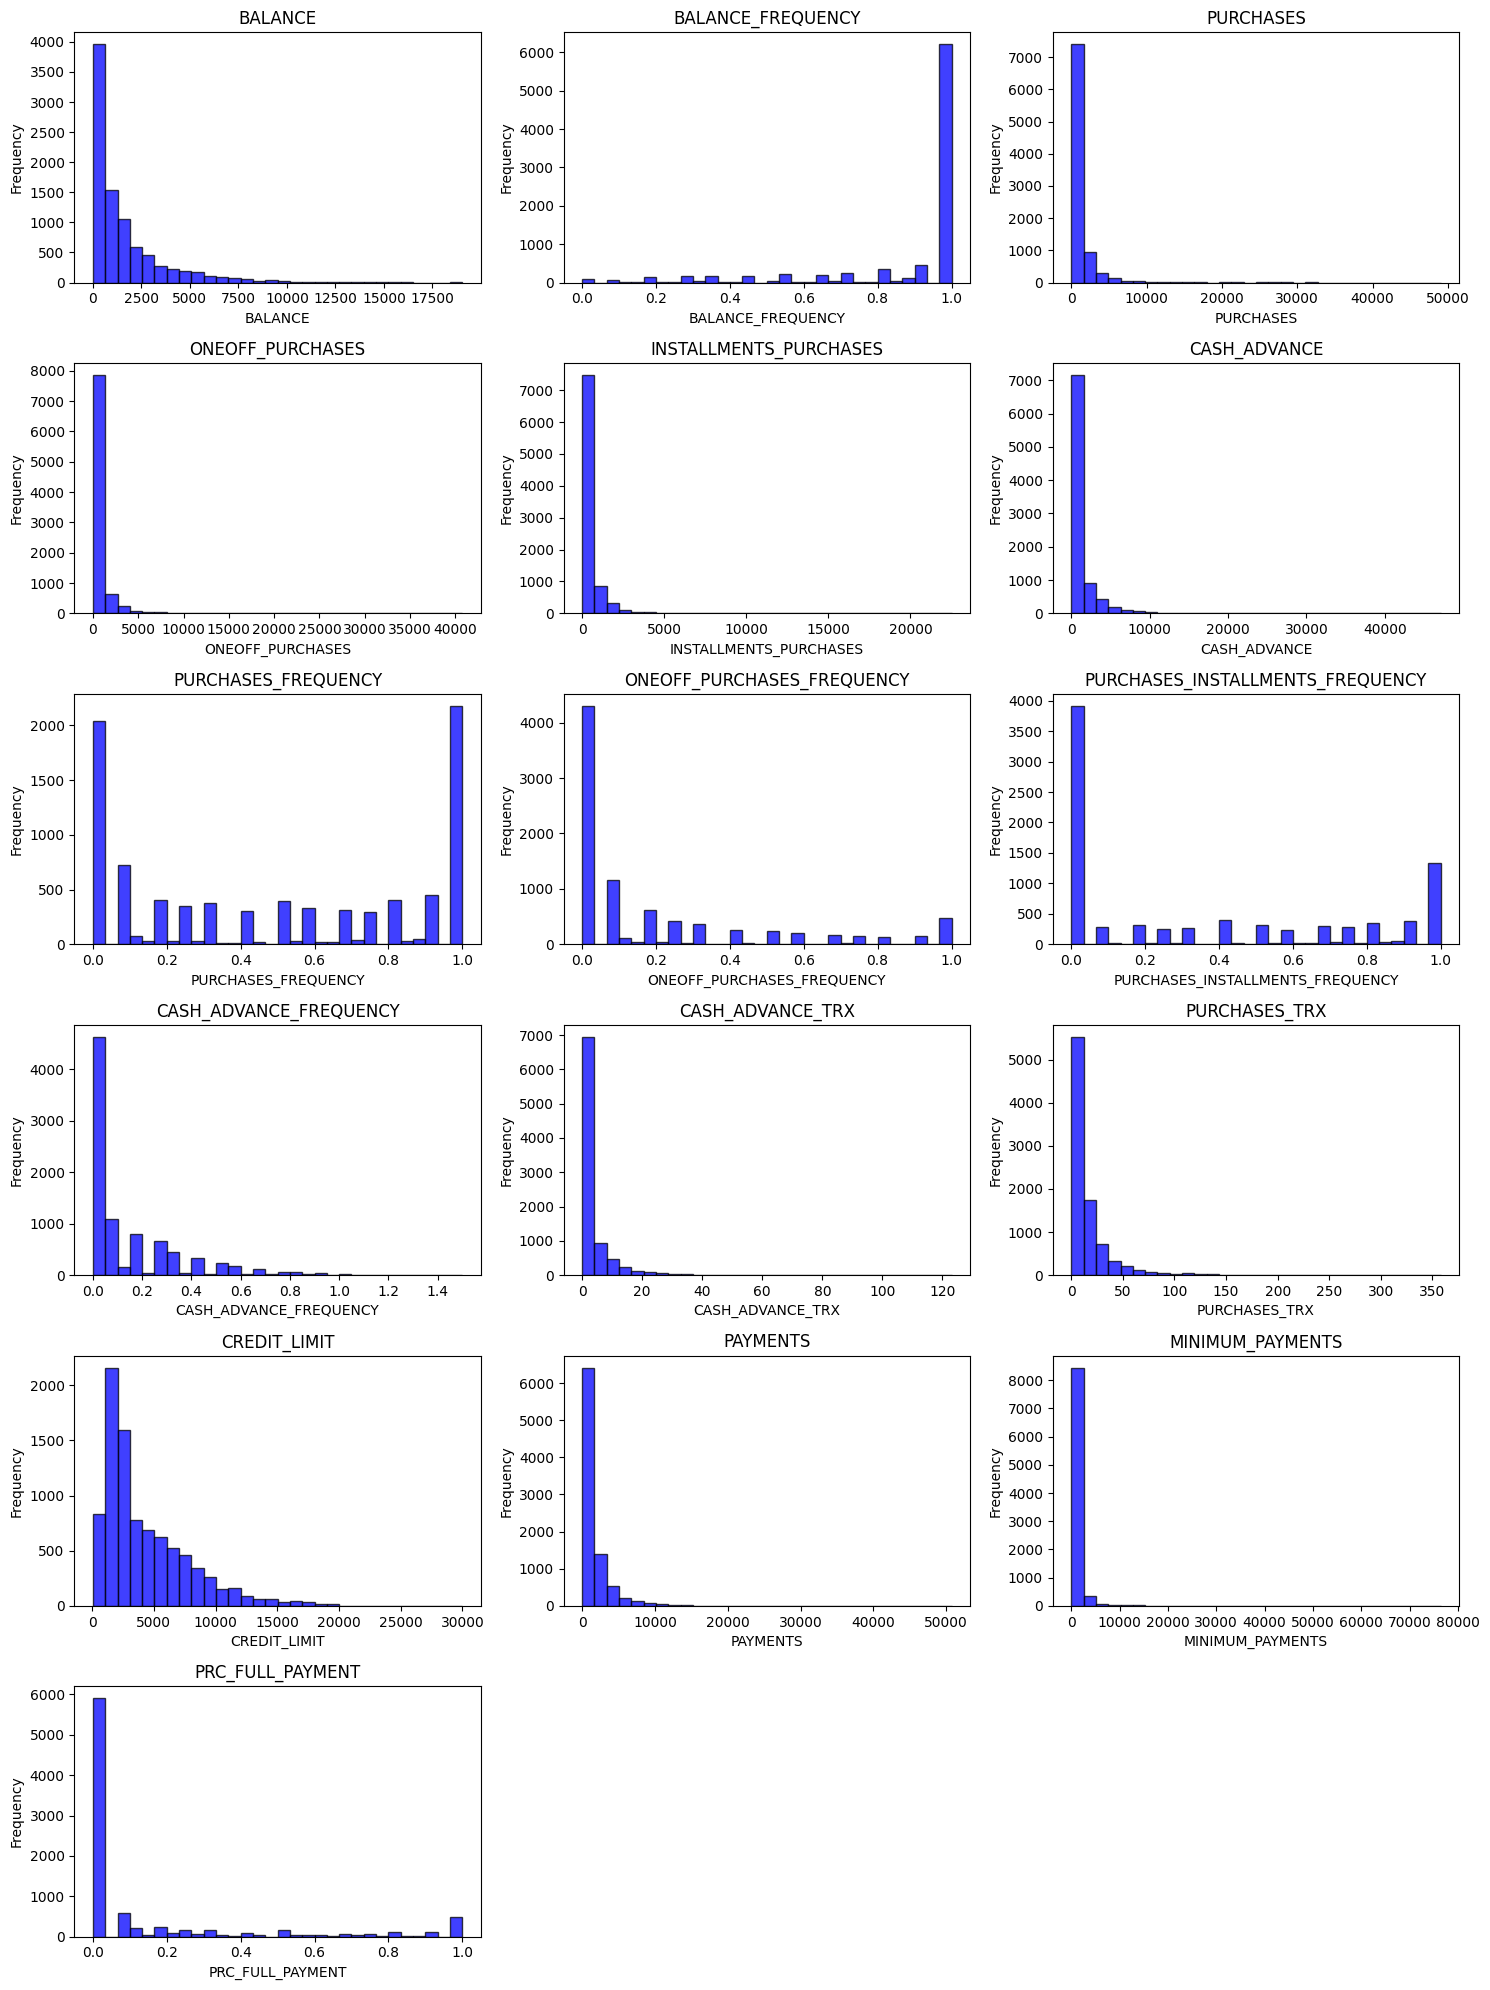

In [17]:
# Histograms for continuous fields

columns_to_plot = [
    'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
    'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
    'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
    'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
    'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT'
]

# Set the figure size
plt.figure(figsize=(15, 20))

# Loop through each column and create a histogram
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(6, 3, i)  
    plt.hist(df[column].dropna(), bins=30, alpha=0.75, color='blue', edgecolor='black')
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()


plt.show()

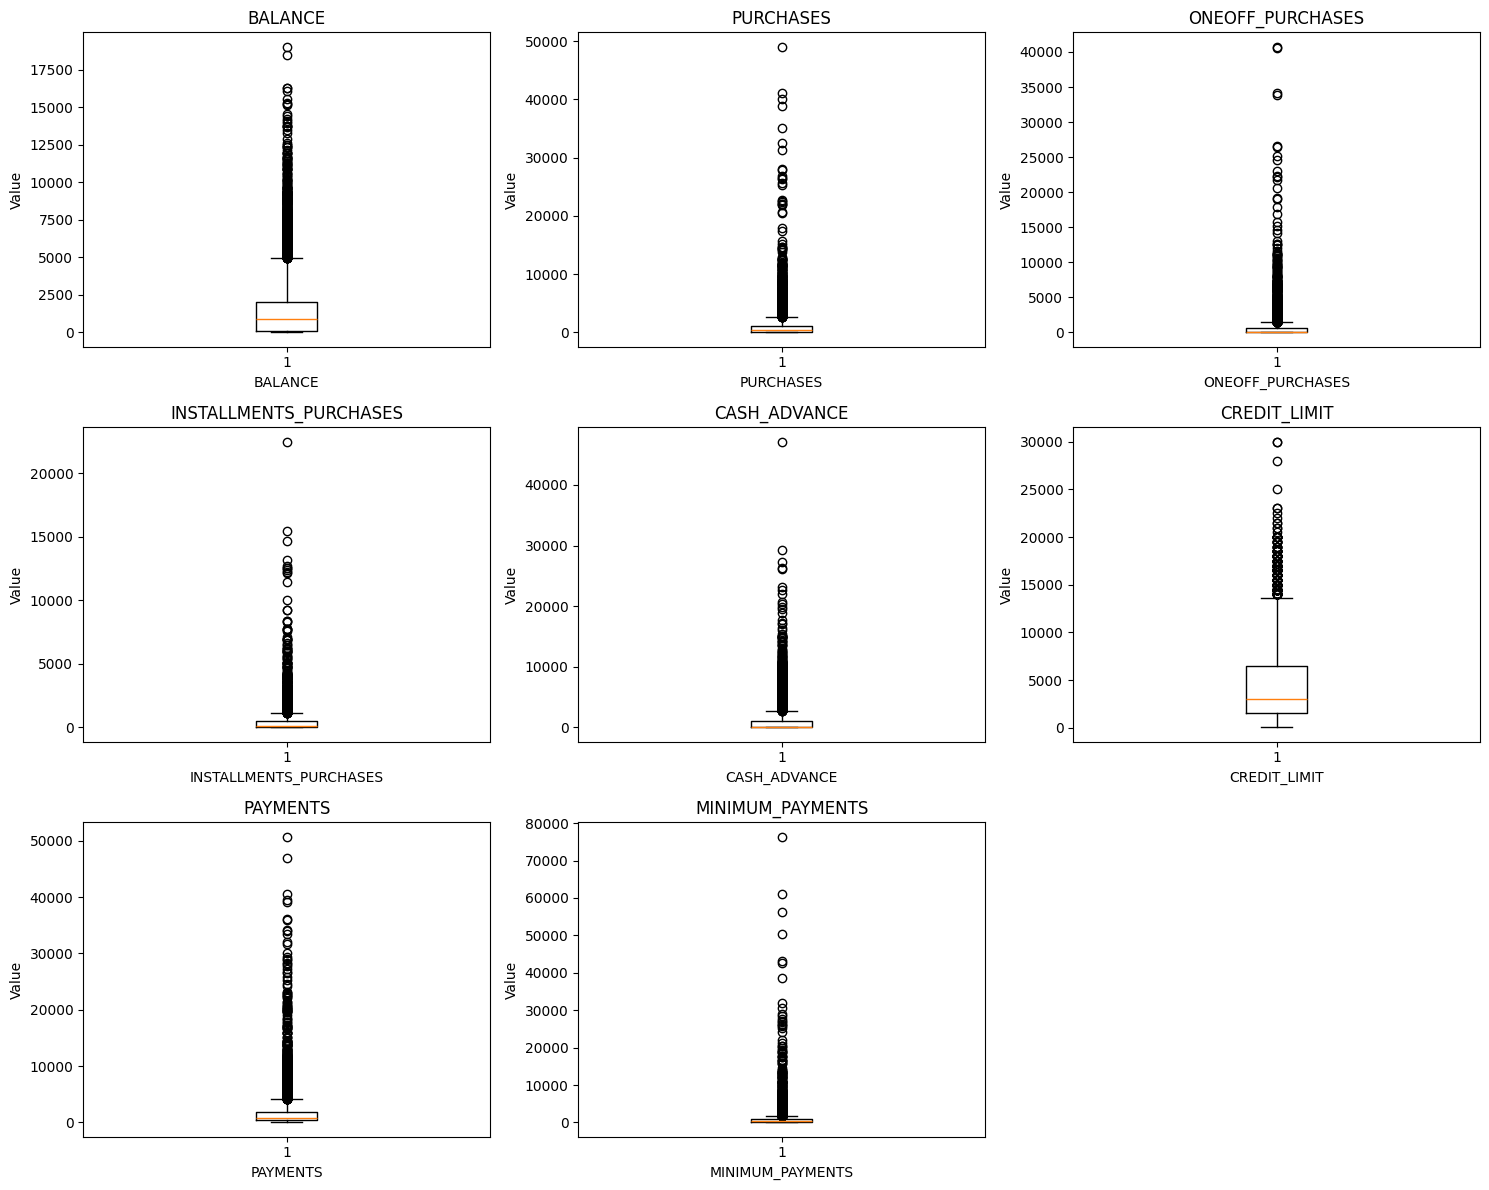

In [18]:
# Since some clustering techniques (eg. K-means, hierarchical) are quite sensitive to outliers, 
# we can consider dropping outliers in the fields with actual monetary values -- Ex. Balance, Purchases etc. 

# Create box plots to have a overview of the outliers under these fields 

columns_to_check = [
    'BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
    'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS'
]


plt.figure(figsize=(15, 12))

# Loop through each column and create a box plot
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(3, 3, i)  
    plt.boxplot(df[column])  
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Value')

plt.tight_layout()
plt.show()


In [19]:
# Drop outliers from the Balance and Purchase columns 

columns_outliers = ['BALANCE', 'PURCHASES']

# Function to remove outliers based on IQR
def remove_outliers_iqr(df, columns):
    for column in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define the outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers before filtering
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outliers_count = len(outliers)
        
        # Filter the DataFrame to remove outliers
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
        
        # Print the bounds and the number of outliers removed for each column
        print(f"{column}: Lower bound = {lower_bound}, Upper bound = {upper_bound}")
        print(f"{column}: Outliers removed = {outliers_count}")

    return df

# Apply the function to remove outliers for Balance and Purchases columns
df = remove_outliers_iqr(df, columns_outliers)

df


BALANCE: Lower bound = -2760.644817, Upper bound = 4943.383447
BALANCE: Outliers removed = 695
PURCHASES: Lower bound = -1485.7825, Upper bound = 2598.0375000000004
PURCHASES: Outliers removed = 724


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,248.178351,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,248.178351,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


## Feature Selection

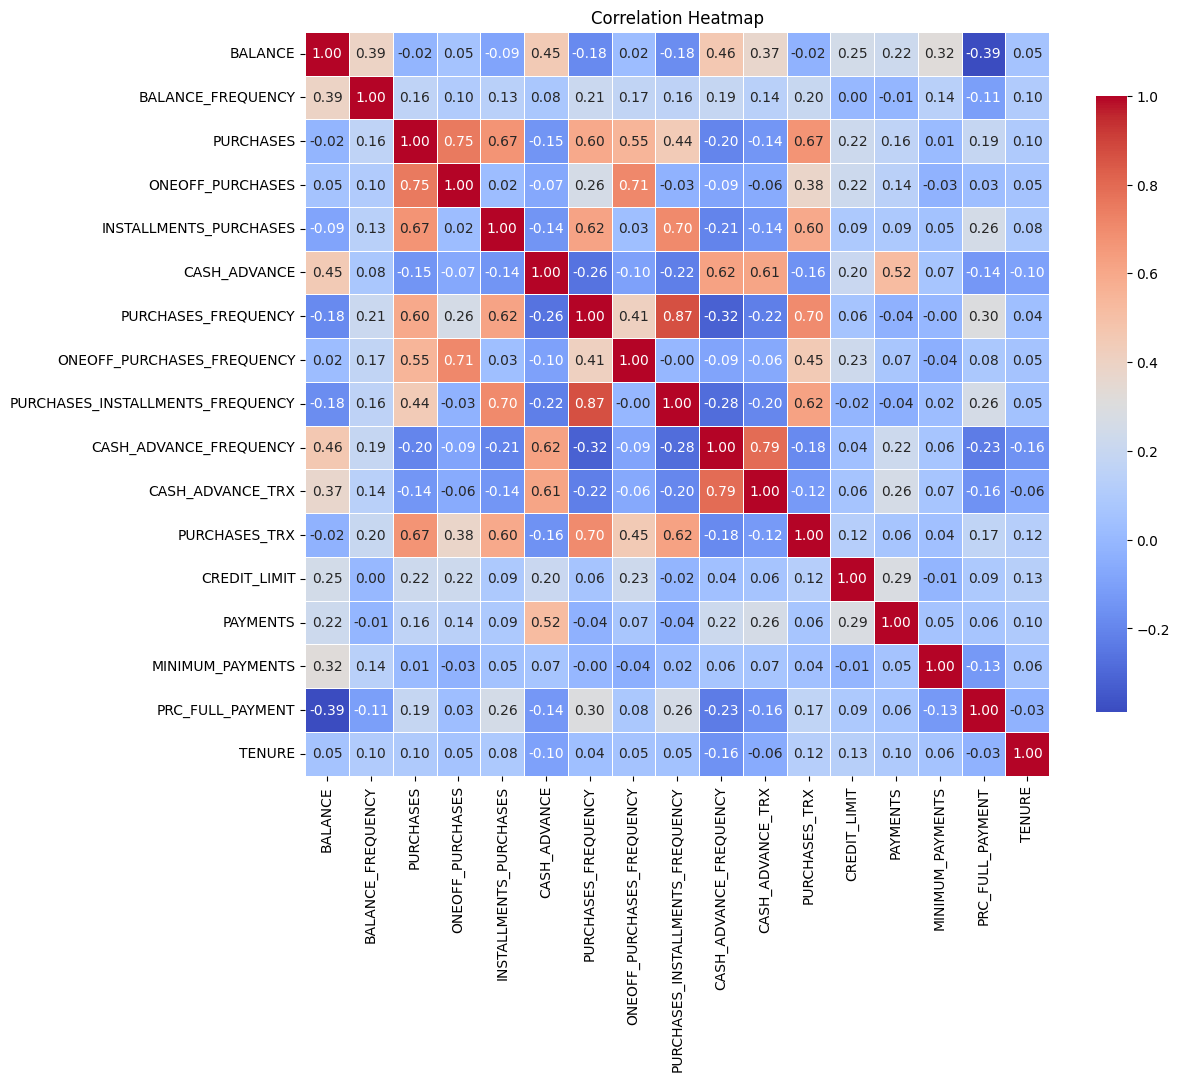

In [20]:
# Construct heatmap to show correlations between fields in the dataset 

columns_to_plot = [
    'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'
]

corr_matrix = df[columns_to_plot].corr()


plt.figure(figsize=(12, 10))

sns.heatmap(
    corr_matrix, 
    annot=True,    
    fmt=".2f",     
    cmap='coolwarm', 
    linewidths=0.5, 
    square=True,   
    cbar_kws={"shrink": 0.8}  
)

# Add a title 
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

## Clustering

#### K-Means

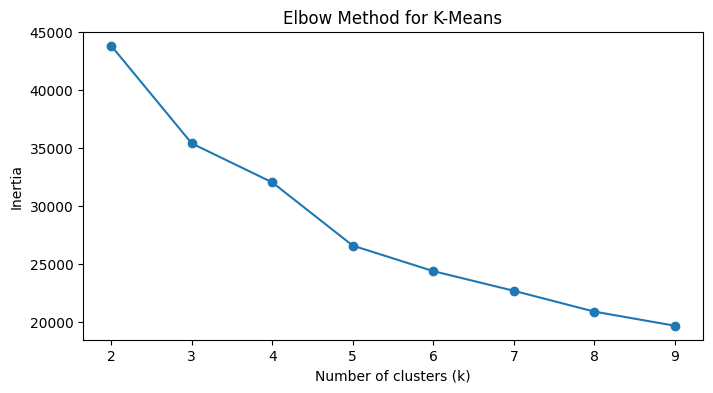

In [21]:

# Data Preprocessing (Scaling)
features = ['TENURE', 'ONEOFF_PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 
            'BALANCE', 'PURCHASES', 'CREDIT_LIMIT', 'PAYMENTS']
X = df[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means Clustering
# Use the Elbow method to find the optimal number of clusters for K-Means
inertia = []
k_values = range(2, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow method
plt.figure(figsize=(8, 4))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for K-Means')
plt.show()



In [22]:
# Fit K-Means with the chosen number of clusters 
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
print(f"K-Means Silhouette Score: {kmeans_silhouette}")


K-Means Silhouette Score: 0.30530764574407565


In [23]:
# Add the K-means cluster labels to the DataFrame
df['Cluster_kmeans'] = kmeans_labels

df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster_kmeans
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,248.178351,0.000000,12,2
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,4
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,248.178351,0.000000,6,4
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,4
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,4


Cluster_kmeans
0     212
1    1447
2    1402
3    3812
4     657
Name: CUST_ID, dtype: int64
Axes(0.125,0.11;0.775x0.77)


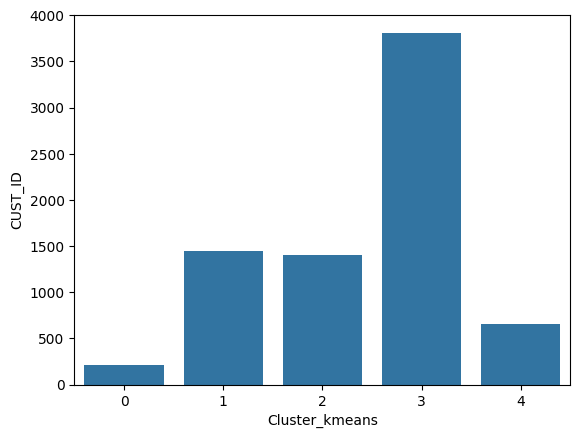

In [24]:
# Count numbers of customers under each cluster 

count = df.groupby("Cluster_kmeans")['CUST_ID'].count()
print(count)
print(sns.barplot(count))

In [25]:
# Calculate mean for each feature in each cluster
cluster_summary = df.groupby('Cluster_kmeans')[features].mean()
print("Cluster Summary Statistics:")
print(cluster_summary)

Cluster Summary Statistics:
                   TENURE  ONEOFF_PURCHASES_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
Cluster_kmeans                                                                  
0               11.716981                    0.120843                0.333005   
1               11.773324                    0.071103                0.332189   
2               11.868046                    0.539246                0.048375   
3               11.892183                    0.057312                0.048223   
4                7.365297                    0.100076                0.185860   

                    BALANCE    PURCHASES  CREDIT_LIMIT     PAYMENTS  
Cluster_kmeans                                                       
0               2421.749212   556.929717   7831.389365  9245.525686  
1               2464.108998   224.748929   4548.422023  1417.941003  
2               1025.041864  1448.042967   5529.274197  1513.663780  
3                514.214263   333.931965   2770.761935

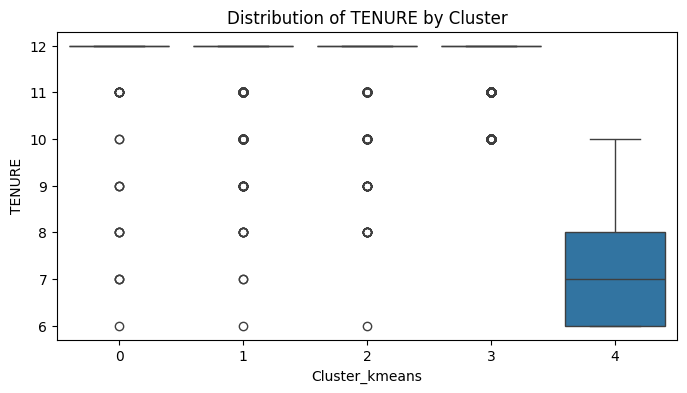

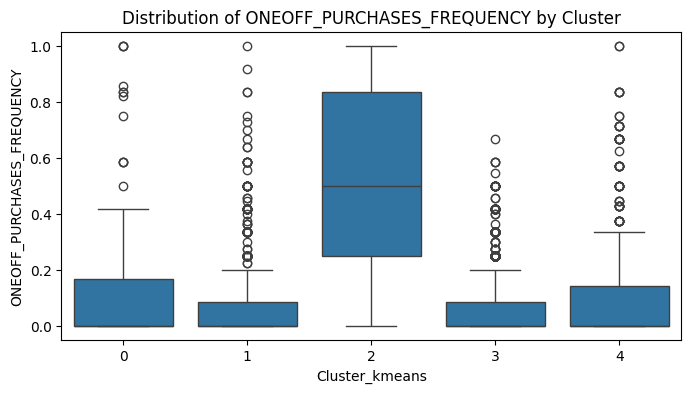

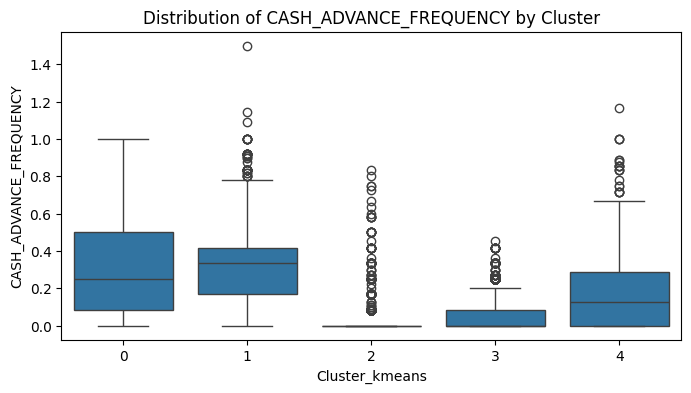

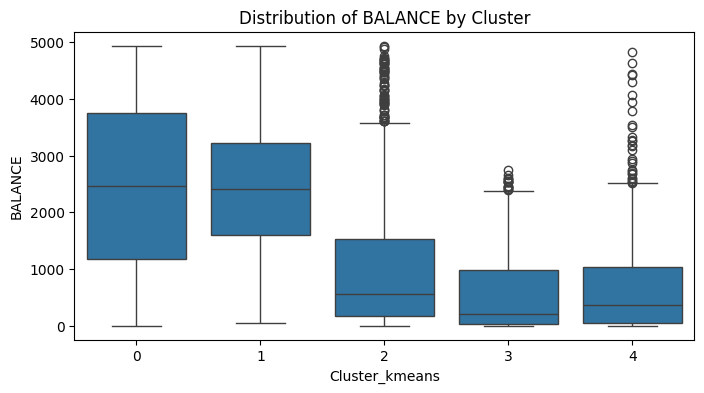

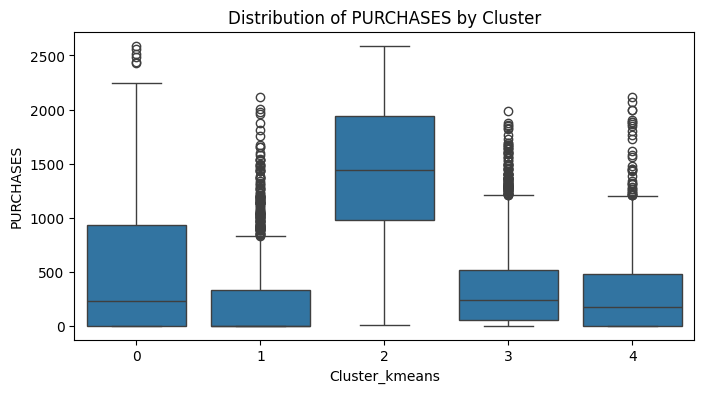

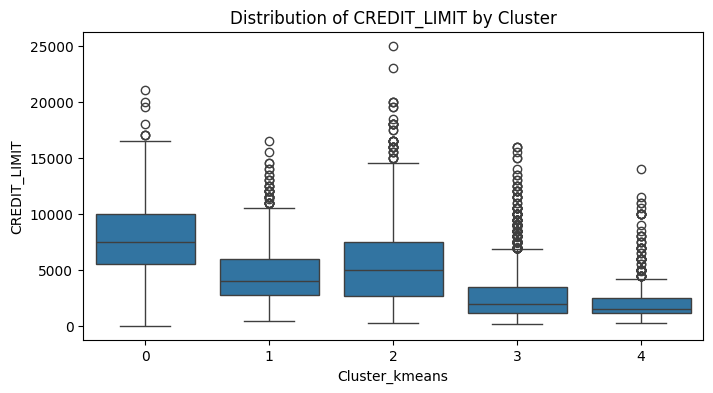

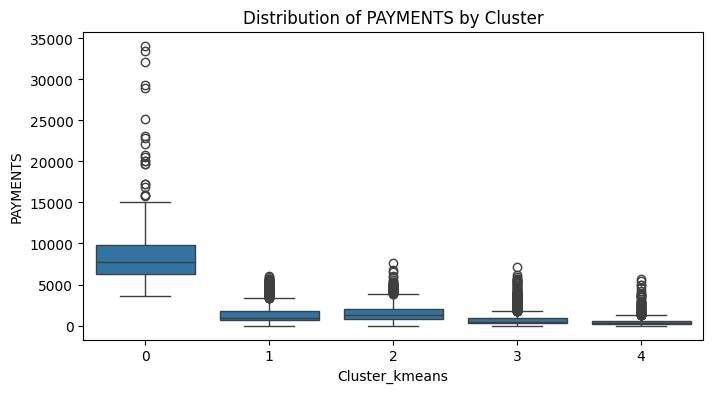

In [26]:
# Plot boxplots for each feature by cluster
for feature in features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Cluster_kmeans', y=feature, data=df)
    plt.title(f'Distribution of {feature} by Cluster')
    plt.show()

#### DBSCAN

In [27]:
# Initialize a dictionary to store the best DBSCAN model parameters and score
best_model_result = {'dbscan': {'eps': None, 'min_samples': None, 'silhouette_score': -1, 'num_clusters': 0}}

# Loop over a range of eps and min_samples values
for eps in [0.2, 0.3, 0.5, 0.7, 0.8]:  
    for min_samples in [10, 20, 30, 40, 50]: 
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(X_scaled)
        
        # Ensure there is more than one cluster for silhouette score calculation
        if len(set(dbscan_labels)) > 1:
            silhouette_avg = silhouette_score(X_scaled, dbscan_labels)
            num_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
            
            if silhouette_avg > best_model_result['dbscan']['silhouette_score']:
                best_model_result['dbscan'] = {'eps': eps, 'min_samples': min_samples, 'silhouette_score': silhouette_avg, 
                                               'num_clusters': num_clusters}
                

# Check if the current silhouette score is the best
            if silhouette_avg > best_model_result['dbscan']['silhouette_score']:
                best_model_result['dbscan'] = {
                    'eps': eps,
                    'min_samples': min_samples,
                    'silhouette_score': silhouette_avg,
                    'num_clusters': num_clusters
                }
                

# Display the best parameters, silhouette score, and number of clusters for DBSCAN
print("Best DBSCAN Model:")
print("Epsilon (eps):", best_model_result['dbscan']['eps'])
print("Min Samples:", best_model_result['dbscan']['min_samples'])
print("Silhouette Score:", best_model_result['dbscan']['silhouette_score'])
print("Number of Clusters (excluding noise):", best_model_result['dbscan']['num_clusters'])

Best DBSCAN Model:
Epsilon (eps): 0.8
Min Samples: 20
Silhouette Score: 0.26894457861838195
Number of Clusters (excluding noise): 2


In [28]:
# Add the DBSCAN cluster labels to the DataFrame
df['Cluster_DBSCAN'] = dbscan_labels

df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster_kmeans,Cluster_DBSCAN
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1,-1
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2,-1
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,248.178351,0.000000,12,2,-1
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,4,0
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,248.178351,0.000000,6,4,0
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,4,0
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,4,-1


In [29]:
# Calculate mean for each feature in each cluster
cluster_summary = df.groupby('Cluster_DBSCAN')[features].mean()
print("Cluster Summary Statistics:")
print(cluster_summary)

Cluster Summary Statistics:
                   TENURE  ONEOFF_PURCHASES_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
Cluster_DBSCAN                                                                  
-1              11.060741                    0.309023                0.200411   
 0              11.720104                    0.058115                0.073881   

                    BALANCE   PURCHASES  CREDIT_LIMIT     PAYMENTS  
Cluster_DBSCAN                                                      
-1              1611.028502  839.796431   5330.914082  2095.451142  
 0               701.827625  327.821644   2703.800800   664.897732  


Cluster_DBSCAN
-1    2914
 0    4616
Name: CUST_ID, dtype: int64
Axes(0.125,0.11;0.775x0.77)


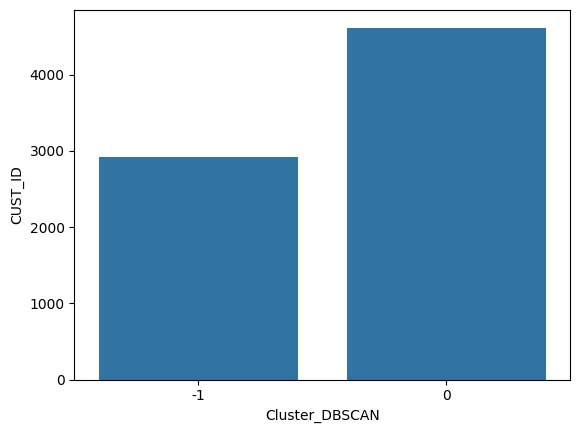

In [30]:
# Count numbers of customers under each cluster 

count = df.groupby("Cluster_DBSCAN")['CUST_ID'].count()
print(count)
print(sns.barplot(count))

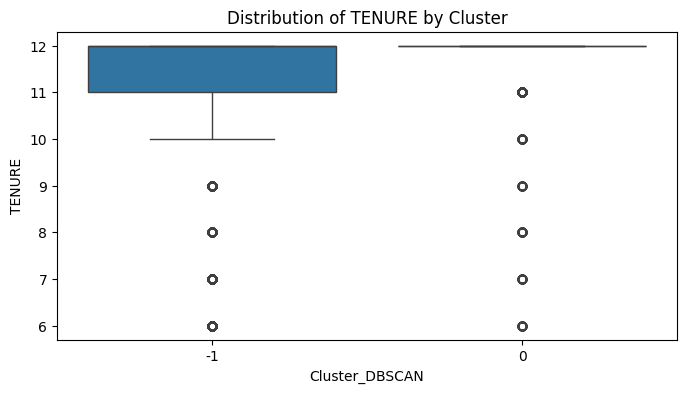

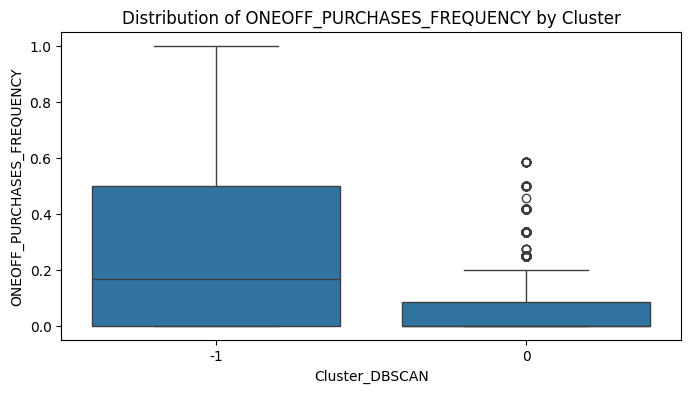

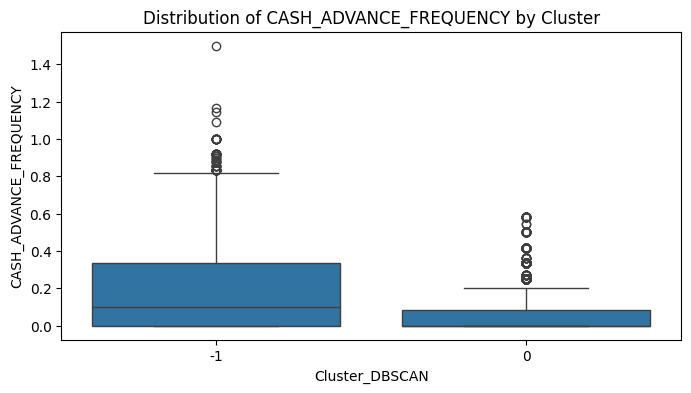

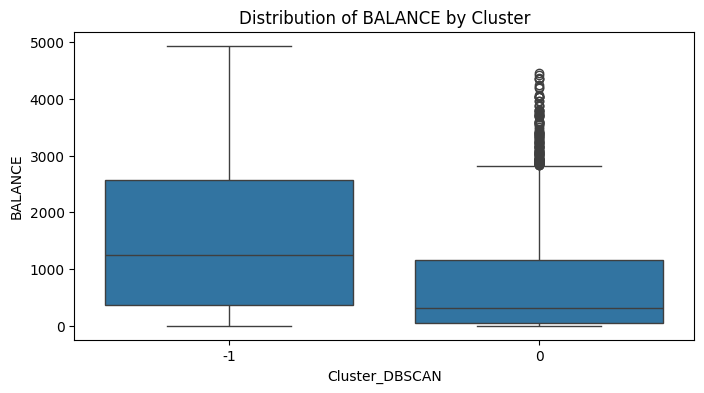

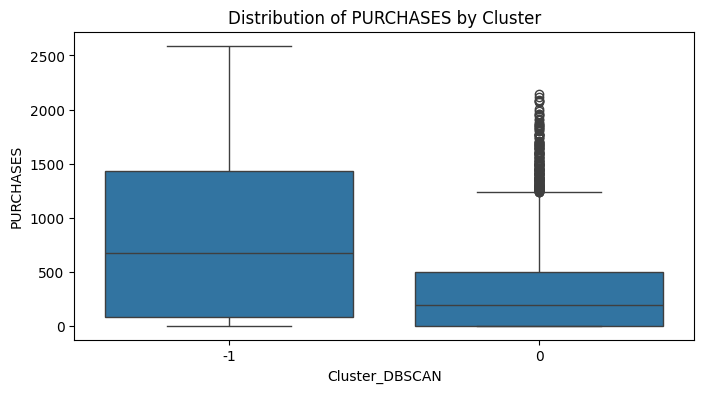

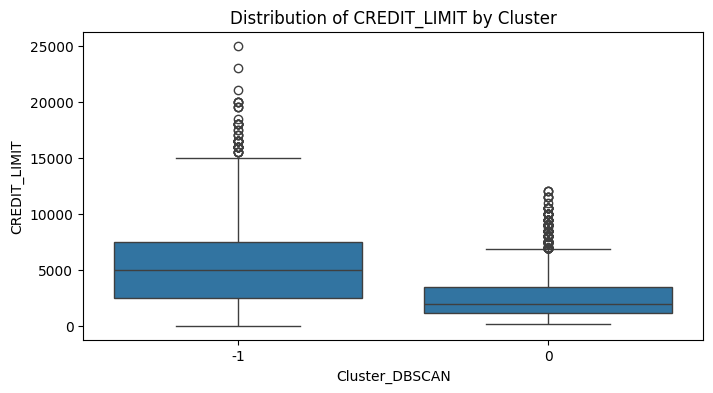

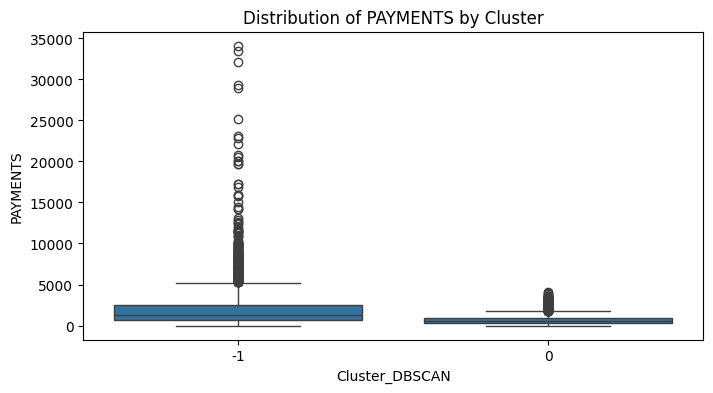

In [31]:
# Plot boxplots for each feature by cluster
for feature in features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Cluster_DBSCAN', y=feature, data=df)
    plt.title(f'Distribution of {feature} by Cluster')
    plt.show()

#### Agglomerative

In [32]:

# Initialize a dictionary to store the best Agglomerative Clustering model parameters and score
best_model_result = {'agglomerative': {'n_clusters': None, 'silhouette_score': -1}}

# Loop over a range of cluster numbers 
for k in range(2, 6):  
    agglomerative = AgglomerativeClustering(n_clusters=k)
    agg_labels = agglomerative.fit_predict(X_scaled)
    
    # Calculate the Silhouette Score for the current number of clusters
    silhouette_avg = silhouette_score(X_scaled, agg_labels)
    
    # Update the best model if this silhouette score is higher
    if silhouette_avg > best_model_result['agglomerative']['silhouette_score']:
        best_model_result['agglomerative'] = {'n_clusters': k, 'silhouette_score': silhouette_avg}
        best_labels = agg_labels  # Store labels for the best model

# Display the best parameters and silhouette score for Agglomerative Clustering
print("Best Agglomerative Clustering Model:")
print("Number of Clusters:", best_model_result['agglomerative']['n_clusters'])
print("Silhouette Score:", best_model_result['agglomerative']['silhouette_score'])


Best Agglomerative Clustering Model:
Number of Clusters: 4
Silhouette Score: 0.2588797091656743


In [33]:
# Add the best cluster labels to the DataFrame
df['Cluster_agg'] = best_labels

df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster_kmeans,Cluster_DBSCAN,Cluster_agg
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,...,0,2,1000.0,201.802084,139.509787,0.000000,12,3,0,2
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,...,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1,-1,0
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,...,0,12,7500.0,622.066742,627.284787,0.000000,12,2,-1,1
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,...,1,1,7500.0,0.000000,248.178351,0.000000,12,2,-1,1
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,...,0,1,1200.0,678.334763,244.791237,0.000000,12,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,...,0,6,1000.0,325.594462,48.886365,0.500000,6,4,0,3
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,...,0,6,1000.0,275.861322,248.178351,0.000000,6,4,0,3
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,...,0,5,1000.0,81.270775,82.418369,0.250000,6,4,0,3
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,...,2,0,500.0,52.549959,55.755628,0.250000,6,4,-1,3


In [34]:
# Calculate mean for each feature in each cluster
cluster_summary = df.groupby('Cluster_agg')[features].mean()
print("Cluster Summary Statistics:")
print(cluster_summary)

Cluster Summary Statistics:
                TENURE  ONEOFF_PURCHASES_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
Cluster_agg                                                                  
0            11.798886                    0.072485                0.313564   
1            11.943932                    0.497150                0.065482   
2            11.889135                    0.069731                0.036454   
3             7.558496                    0.120566                0.192749   

                 BALANCE    PURCHASES  CREDIT_LIMIT     PAYMENTS  
Cluster_agg                                                       
0            2242.372847   242.220630   4601.460285  2426.736088  
1            1218.397955  1408.540199   4557.608376  1452.696098  
2             462.132909   351.445003   3238.992069   638.215111  
3             731.219856   380.165418   2294.503250   654.306902  


Cluster_agg
0    1795
1    1409
2    3608
3     718
Name: CUST_ID, dtype: int64
Axes(0.125,0.11;0.775x0.77)


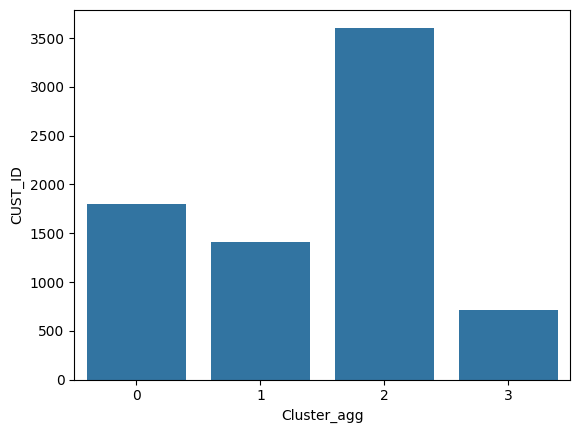

In [35]:
# Count numbers of customers under each cluster 

count = df.groupby("Cluster_agg")['CUST_ID'].count()
print(count)
print(sns.barplot(count))

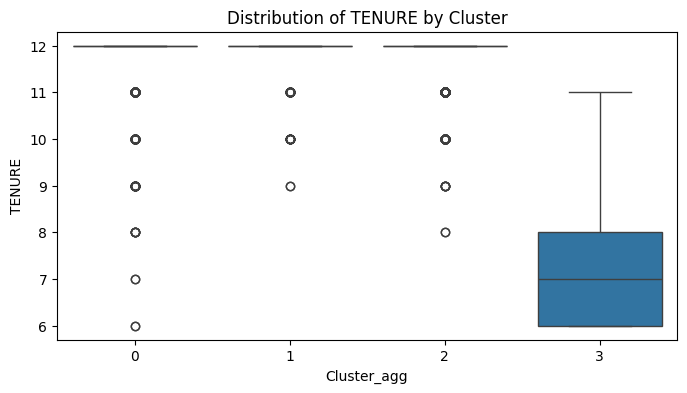

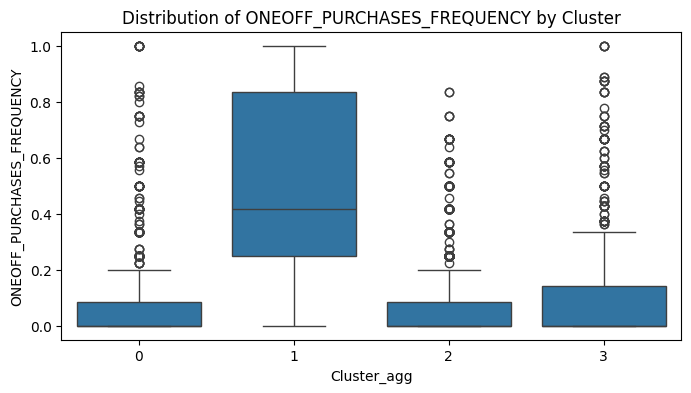

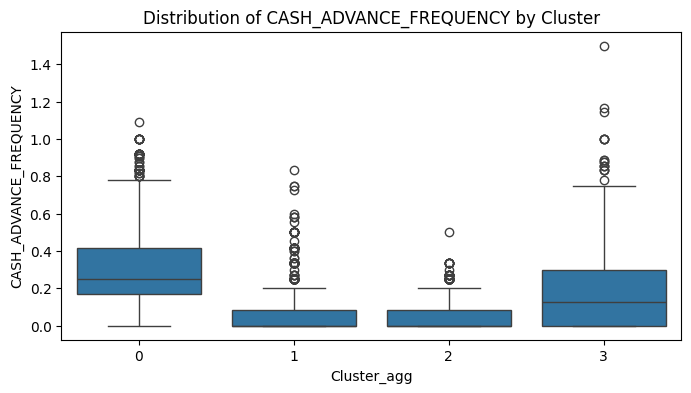

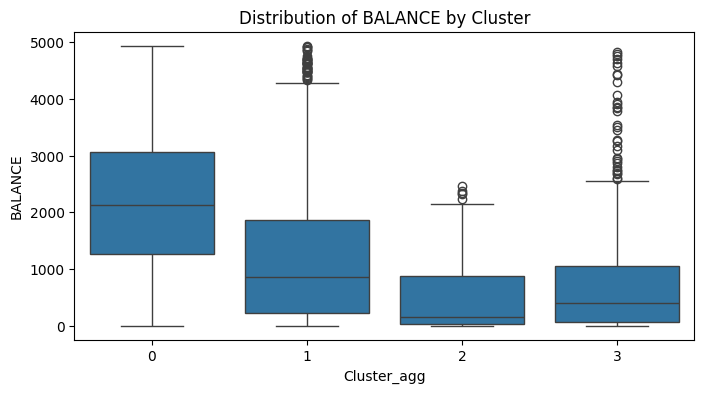

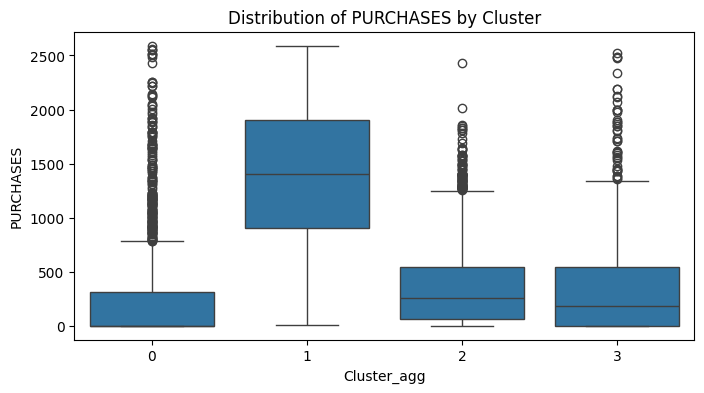

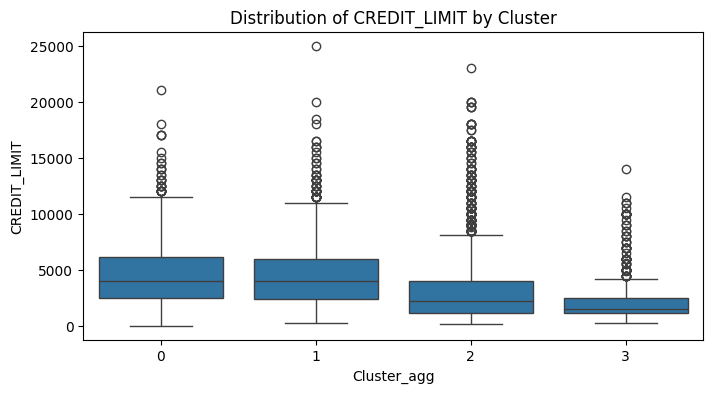

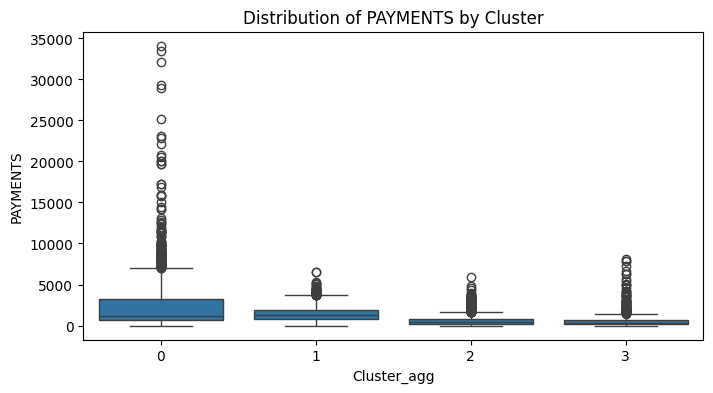

In [36]:
# Plot boxplots for each feature by cluster
for feature in features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Cluster_agg', y=feature, data=df)
    plt.title(f'Distribution of {feature} by Cluster')
    plt.show()

#### HDBSCAN

In [37]:
# Initialize a dictionary to store the best HDBSCAN model parameters and score
best_model_result = {'hdbscan': {'min_cluster_size': None, 'min_samples': None, 
                                 'cluster_selection_epsilon': None, 'silhouette_score': -1}}

# Define a range for each parameter
min_cluster_size_range = [5, 10, 20, 30]
min_samples_range = [5, 10, 15]
cluster_selection_epsilon_range = [0.0, 0.1, 0.2, 0.3]

# Loop over parameter combinations
for min_cluster_size in min_cluster_size_range:
    for min_samples in min_samples_range:
        for cluster_selection_epsilon in cluster_selection_epsilon_range:
            # Initialize and fit HDBSCAN with the current parameters
            hdb = HDBSCAN(min_cluster_size=min_cluster_size,
                                  min_samples=min_samples,
                                  cluster_selection_epsilon=cluster_selection_epsilon)  
            hdb_labels = hdb.fit_predict(X_scaled)

            # Only calculate the silhouette score if more than one cluster was formed
            if len(set(hdb_labels)) > 1:
                silhouette_avg = silhouette_score(X_scaled, hdb_labels)
                # Check if the current silhouette score is the best
                if silhouette_avg > best_model_result['hdbscan']['silhouette_score']:
                    best_model_result['hdbscan'] = {
                        'min_cluster_size': min_cluster_size,
                        'min_samples': min_samples,
                        'cluster_selection_epsilon': cluster_selection_epsilon,
                        'silhouette_score': silhouette_avg
                    }

# Display the best parameters and silhouette score for HDBSCAN
print("Best HDBSCAN Model:")
print("Min Cluster Size:", best_model_result['hdbscan']['min_cluster_size'])
print("Min Samples:", best_model_result['hdbscan']['min_samples'])
print("Cluster Selection Epsilon:", best_model_result['hdbscan']['cluster_selection_epsilon'])
print("Silhouette Score:", best_model_result['hdbscan']['silhouette_score'])

Best HDBSCAN Model:
Min Cluster Size: 30
Min Samples: 5
Cluster Selection Epsilon: 0.2
Silhouette Score: -0.1817183944343154


## Interpreting Clusters

In [38]:
df.groupby('Cluster_kmeans')[features].mean()

,TENURE,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,BALANCE,PURCHASES,CREDIT_LIMIT,PAYMENTS
Cluster_kmeans,,,,,,,
0,11.716981,0.120843,0.333005,2421.749212,556.929717,7831.389365,9245.525686
1,11.773324,0.071103,0.332189,2464.108998,224.748929,4548.422023,1417.941003
2,11.868046,0.539246,0.048375,1025.041864,1448.042967,5529.274197,1513.663780
3,11.892183,0.057312,0.048223,514.214263,333.931965,2770.761935,705.423402
4,7.365297,0.100076,0.185860,696.960967,325.731842,2220.730594,536.179381


In [39]:
 df.groupby('Cluster_DBSCAN')[features].mean()

,TENURE,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,BALANCE,PURCHASES,CREDIT_LIMIT,PAYMENTS
Cluster_DBSCAN,,,,,,,
-1,11.060741,0.309023,0.200411,1611.028502,839.796431,5330.914082,2095.451142
0,11.720104,0.058115,0.073881,701.827625,327.821644,2703.800800,664.897732


In [40]:
df.groupby('Cluster_agg')[features].mean()

,TENURE,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,BALANCE,PURCHASES,CREDIT_LIMIT,PAYMENTS
Cluster_agg,,,,,,,
0,11.798886,0.072485,0.313564,2242.372847,242.220630,4601.460285,2426.736088
1,11.943932,0.497150,0.065482,1218.397955,1408.540199,4557.608376,1452.696098
2,11.889135,0.069731,0.036454,462.132909,351.445003,3238.992069,638.215111
3,7.558496,0.120566,0.192749,731.219856,380.165418,2294.503250,654.306902


## Performance Comparison of Clustering Models

In [41]:
# Data for performance comparison
data = {
    'Model': ['K-Means', 'DBSCAN', 'Agglomerative'],
    'Number of Clusters': [5, 2, 4],
    'Silhouette Score': [0.305, 0.269, 0.259],
    'Time Complexity': ['Fast', 'Medium', 'Slow'],
    'Pros': [
        'Works well with large datasets',
        'Detects noise/outliers effectively',
        'Better for small datasets'
    ],
    'Cons': [
        'Sensitive to outliers',
        'Struggles with varying density clusters',
        'Computationally expensive for large data'
    ]
}

# Create DataFrame
cluster_df = pd.DataFrame(data)

cluster_df

,Model,Number of Clusters,Silhouette Score,Time Complexity,Pros,Cons
0,K-Means,5,0.305,Fast,Works well with large datasets,Sensitive to outliers
1,DBSCAN,2,0.269,Medium,Detects noise/outliers effectively,Struggles with varying density clusters
2,Agglomerative,4,0.259,Slow,Better for small datasets,Computationally expensive for large data
